# Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline
plt.style.use('ggplot')

# Importing the datasets

In [3]:
cab_rides=pd.read_csv('/cab_rides.csv')
weather=pd.read_csv('/weather.csv')

# Data description

*   Data Source:  Kaggle Website -
https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices
     Two Data Sets are merged. One Data Set consists of Rides booked, their Source, destination and price values. The Second Data Set consists of records of various locations, temperature, humidity and pressure conditions. The Data Sets are merged based on the Location and Time Stamp.
*   Data Size - Merged and Cleaned Data Set consists of 637976 records.

In [4]:
cab_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
cab_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90114 entries, 0 to 90113
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          90114 non-null  float64
 1   cab_type          90114 non-null  object 
 2   time_stamp        90114 non-null  int64  
 3   destination       90114 non-null  object 
 4   source            90114 non-null  object 
 5   price             83024 non-null  float64
 6   surge_multiplier  90114 non-null  float64
 7   id                90114 non-null  object 
 8   product_id        90113 non-null  object 
 9   name              90113 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ MB


In [6]:
cab_rides.describe()

,distance,time_stamp,price,surge_multiplier
count,90114.000000,9.011400e+04,83024.000000,90114.000000
mean,2.196528,1.544034e+12,16.585066,1.015189
std,1.141365,6.880902e+08,9.360157,0.095735
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.290000,1.543441e+12,9.000000,1.000000
50%,2.170000,1.543724e+12,13.500000,1.000000
75%,2.940000,1.544819e+12,22.500000,1.000000
max,7.500000,1.545161e+12,92.000000,3.000000


In [9]:
cab_rides.shape

(90114, 10)

In [10]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [12]:
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [13]:
weather.shape

(6276, 8)

# Removing null and duplicate values

In [14]:
cab_rides = cab_rides.drop_duplicates(keep = 'first')

In [15]:
weather = weather.drop_duplicates(keep = 'first')

In [16]:
cab_rides[cab_rides.duplicated(keep=False)]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name


In [17]:
weather[weather.duplicated(keep=False)]

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind


In [19]:
cab_rides.isnull().sum().sort_values(ascending=False)

price               7090
product_id             1
name                   1
distance               0
cab_type               0
time_stamp             0
destination            0
source                 0
surge_multiplier       0
id                     0
dtype: int64

In [18]:
weather.isnull().sum().sort_values(ascending=False)

rain          5382
temp             0
location         0
clouds           0
pressure         0
time_stamp       0
humidity         0
wind             0
dtype: int64

Replacing the null values with column mean

In [20]:
missing_val_cols = ["price"]

In [21]:
for col in missing_val_cols:
    mean = cab_rides[col].mean()
    cab_rides[col].fillna(mean, inplace=True)

In [22]:
missing_val_cols = ["rain"]

In [23]:
for col in missing_val_cols:
    mean = weather[col].mean()
    weather[col].fillna(mean, inplace=True)

Now there would be no missing values

# Merging of cab_rides and weather data set

1.   Join of rides and weather details of source (Using timestamp, source)
2.   Join of rides and weather details of destination (Using timestamp, destination)

In [34]:
from numpy.ma.core import count
#Create a new time stamp column in rides dataframe

#weather['time_stamp_date']=weather['time_stamp']
weather['time_stamp'].head()
weather['time_stamp'][0]

1545003901

In [35]:
cab_rides['time_stamp_date']=cab_rides['time_stamp']/1000

In [36]:
import math
print(math.floor(1544952607890/1000))

1544952607


In [37]:
weather[weather['location']=='Back Bay'].to_csv('weather_data_backbay.csv')

In [38]:
a_df=pd.to_datetime(weather['time_stamp'],unit='s').dt.minute

In [39]:
a_df

0       45
1       45
2       45
3       45
4       45
        ..
6271    52
6272    52
6273    52
6274    52
6275    52
Name: time_stamp, Length: 6276, dtype: int64

In [40]:
ts_exp=pd.DataFrame(a_df, columns=['time_stamp']).groupby(['time_stamp']).size()

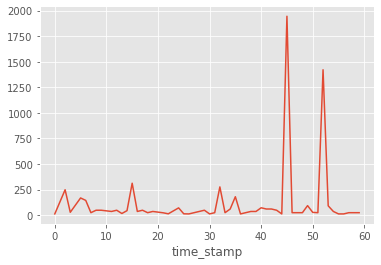

In [41]:
ts_exp.plot()

In [42]:
#Convert timestamp to date format - weather

weather['time_stamp_date']=pd.to_datetime(weather['time_stamp'], unit='s').dt.date
weather['time_stamp_hour']=pd.to_datetime(weather['time_stamp'], unit='s').dt.hour
weather['time_stamp_minutes']=pd.to_datetime(weather['time_stamp'], unit='s').dt.minute

#Check the data
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,time_stamp_date,time_stamp_hour,time_stamp_minutes
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16,23,45
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16,23,45
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16,23,45
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16,23,45
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16,23,45


In [43]:
f={'temp':['mean'],
   'clouds':['mean'],
   'pressure':['mean'],
   'humidity':['mean'],
   'wind':['mean']
  }
weather_source=weather.groupby(['time_stamp_date','time_stamp_hour','location'],as_index=False).mean()
weather_source.drop(['time_stamp','time_stamp_minutes'],axis=1,inplace=True)
weather_source.rename(columns={"location": "source"},inplace=True)
weather_source.head()

,time_stamp_date,time_stamp_hour,source,temp,clouds,pressure,rain,humidity,wind
0,2018-11-26,3,Back Bay,41.04,0.87,1014.39,0.057652,0.92,1.46
1,2018-11-26,3,Beacon Hill,41.02,0.87,1014.39,0.057652,0.92,1.50
2,2018-11-26,3,Boston University,41.07,0.86,1014.39,0.057652,0.92,1.36
3,2018-11-26,3,Fenway,40.84,0.88,1014.35,0.057652,0.93,1.31
4,2018-11-26,3,Financial District,40.95,0.89,1014.35,0.057652,0.93,1.49


In [44]:
f={'temp':['mean'],
   'clouds':['mean'],
   'pressure':['mean'],
   'humidity':['mean'],
   'wind':['mean']
  }
weather_destination=weather.groupby(['time_stamp_date','time_stamp_hour','location'],as_index=False).mean()
weather_destination.drop(['time_stamp','time_stamp_minutes'],axis=1,inplace=True)
weather_destination.rename(columns={"location": "destination"},inplace=True)
weather_destination.head()

,time_stamp_date,time_stamp_hour,destination,temp,clouds,pressure,rain,humidity,wind
0,2018-11-26,3,Back Bay,41.04,0.87,1014.39,0.057652,0.92,1.46
1,2018-11-26,3,Beacon Hill,41.02,0.87,1014.39,0.057652,0.92,1.50
2,2018-11-26,3,Boston University,41.07,0.86,1014.39,0.057652,0.92,1.36
3,2018-11-26,3,Fenway,40.84,0.88,1014.35,0.057652,0.93,1.31
4,2018-11-26,3,Financial District,40.95,0.89,1014.35,0.057652,0.93,1.49


In [45]:
#Convert timestamp to date format - Cab rides
cab_rides['time_stamp']=cab_rides['time_stamp']/1000   # Change from nano seconds to seconds
cab_rides['time_stamp']=cab_rides['time_stamp'].apply(np.floor)  # Remove the decimals by taking floor value

cab_rides['time_stamp_date']=pd.to_datetime(cab_rides['time_stamp'], unit='s').dt.date
cab_rides['time_stamp_hour']=pd.to_datetime(cab_rides['time_stamp'], unit='s').dt.hour
cab_rides['time_stamp_minutes']=pd.to_datetime(cab_rides['time_stamp'], unit='s').dt.minute

#Check the data
cab_rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time_stamp_date,time_stamp_hour,time_stamp_minutes
0,0.44,Lyft,1.544953e+09,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16,9,30
1,0.44,Lyft,1.543284e+09,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27,2,0
2,0.44,Lyft,1.543367e+09,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28,1,0
3,0.44,Lyft,1.543554e+09,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30,4,53
4,0.44,Lyft,1.543463e+09,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29,3,49


In [46]:
cab_rides_final=pd.merge(cab_rides,weather_source,how='left',on=['time_stamp_date','time_stamp_hour','source'])
cab_rides_final.rename(columns={'temp':'source_temp','clouds':'source_clouds','pressure':'source_pressure','humidity':'source_humidity','wind':'source_wind'},inplace=True)


In [47]:
print(len(cab_rides_final))
print(len(cab_rides))

90114
90114


In [48]:
cab_rides_final=pd.merge(cab_rides_final,weather_destination,how='left',on=['time_stamp_date','time_stamp_hour','destination'])
cab_rides_final.rename(columns={'temp':'destination_temp','clouds':'destination_clouds','pressure':'destination_pressure','humidity':'destination_humidity','wind':'destination_wind'},inplace=True)

cab_rides_final.loc[(cab_rides_final.time_stamp_hour >= 6) & (cab_rides_final.time_stamp_hour < 12) , 'time_of_day'] = 'Morning'
cab_rides_final.loc[(cab_rides_final.time_stamp_hour >= 12) & (cab_rides_final.time_stamp_hour < 15) , 'time_of_day'] = 'Afternoon'
cab_rides_final.loc[(cab_rides_final.time_stamp_hour >= 15) & (cab_rides_final.time_stamp_hour < 18) , 'time_of_day'] = 'Evening'
cab_rides_final.loc[(cab_rides_final.time_stamp_hour >= 18) | (cab_rides_final.time_stamp_hour < 6) , 'time_of_day'] = 'Night'


cab_rides_final['weekday'] = cab_rides_final['time_stamp_date'].apply(lambda x: x.weekday())
cab_rides_final["weekday"] = cab_rides_final["weekday"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
cab_rides_final['fare_per_mile']=cab_rides_final['price']/cab_rides_final['distance']


In [49]:
print(len(cab_rides_final))
print(len(cab_rides))

90114
90114


In [50]:
print(cab_rides_final.columns)
cab_rides_final.head()

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'time_stamp_date',
       'time_stamp_hour', 'time_stamp_minutes', 'source_temp', 'source_clouds',
       'source_pressure', 'rain_x', 'source_humidity', 'source_wind',
       'destination_temp', 'destination_clouds', 'destination_pressure',
       'rain_y', 'destination_humidity', 'destination_wind', 'time_of_day',
       'weekday', 'fare_per_mile'],
      dtype='object')


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time_stamp_date,time_stamp_hour,time_stamp_minutes,source_temp,source_clouds,source_pressure,rain_x,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,rain_y,destination_humidity,destination_wind,time_of_day,weekday,fare_per_mile
0,0.44,Lyft,1.544953e+09,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16,9,30,38.460,0.290000,1022.25,0.057652,0.760000,7.68,38.43,0.220000,1022.420000,0.057652,0.76,7.84,Morning,Sunday,11.363636
1,0.44,Lyft,1.543284e+09,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27,2,0,44.065,0.995000,1002.88,0.106000,0.895000,12.63,44.02,0.995000,1002.885000,0.117750,0.90,12.58,Night,Tuesday,25.000000
2,0.44,Lyft,1.543367e+09,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Night,Wednesday,15.909091
3,0.44,Lyft,1.543554e+09,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30,4,53,35.080,0.000000,1013.71,0.057652,0.700000,5.25,35.06,0.000000,1013.710000,0.057652,0.70,5.22,Night,Friday,59.090909
4,0.44,Lyft,1.543463e+09,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29,3,49,37.680,0.433333,998.42,0.057652,0.706667,11.16,37.61,0.433333,998.423333,0.057652,0.71,11.12,Night,Thursday,20.454545


In [51]:
cab_rides_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90114 entries, 0 to 90113
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   distance              90114 non-null  float64
 1   cab_type              90114 non-null  object 
 2   time_stamp            90114 non-null  float64
 3   destination           90114 non-null  object 
 4   source                90114 non-null  object 
 5   price                 90114 non-null  float64
 6   surge_multiplier      90114 non-null  float64
 7   id                    90114 non-null  object 
 8   product_id            90113 non-null  object 
 9   name                  90113 non-null  object 
 10  time_stamp_date       90114 non-null  object 
 11  time_stamp_hour       90114 non-null  int64  
 12  time_stamp_minutes    90114 non-null  int64  
 13  source_temp           89737 non-null  float64
 14  source_clouds         89737 non-null  float64
 15  source_pressure    

In [52]:
cab_rides_final.to_csv('cab_rides_final.csv')

Description of merged dataset

In [53]:
cab_rides_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90114 entries, 0 to 90113
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   distance              90114 non-null  float64
 1   cab_type              90114 non-null  object 
 2   time_stamp            90114 non-null  float64
 3   destination           90114 non-null  object 
 4   source                90114 non-null  object 
 5   price                 90114 non-null  float64
 6   surge_multiplier      90114 non-null  float64
 7   id                    90114 non-null  object 
 8   product_id            90113 non-null  object 
 9   name                  90113 non-null  object 
 10  time_stamp_date       90114 non-null  object 
 11  time_stamp_hour       90114 non-null  int64  
 12  time_stamp_minutes    90114 non-null  int64  
 13  source_temp           89737 non-null  float64
 14  source_clouds         89737 non-null  float64
 15  source_pressure    

In [54]:
cab_rides_final.describe()

,distance,time_stamp,price,surge_multiplier,time_stamp_hour,time_stamp_minutes,source_temp,source_clouds,source_pressure,rain_x,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,rain_y,destination_humidity,destination_wind,fare_per_mile
count,90114.000000,9.011400e+04,90114.000000,90114.000000,90114.000000,90114.000000,89737.000000,89737.000000,89737.000000,89737.000000,89737.000000,89737.000000,89737.000000,89737.000000,89737.000000,89737.000000,89737.000000,89737.000000,90114.000000
mean,2.196528,1.544034e+09,16.585066,1.015189,11.565328,29.154671,39.162903,0.668900,1010.089715,0.056046,0.747669,6.957768,39.161868,0.668974,1010.089675,0.056026,0.747690,6.957066,9.784090
std,1.141365,6.880902e+05,8.984391,0.095735,6.989508,17.277587,6.567772,0.312388,13.387880,0.027622,0.128439,3.631022,6.567995,0.312340,13.387959,0.027630,0.128401,3.630981,14.116095
min,0.020000,1.543204e+09,2.500000,1.000000,0.000000,0.000000,19.620000,0.000000,988.325000,0.000200,0.450000,0.300000,19.620000,0.000000,988.325000,0.000200,0.450000,0.300000,0.556586
25%,1.290000,1.543441e+09,9.500000,1.000000,5.000000,15.000000,36.050000,0.430000,999.795000,0.057652,0.650000,3.650000,36.050000,0.430000,999.795000,0.057652,0.650000,3.650000,4.807265
50%,2.170000,1.543724e+09,16.000000,1.000000,12.000000,30.000000,40.150000,0.760000,1009.065000,0.057652,0.730000,6.780000,40.150000,0.760000,1009.065000,0.057652,0.730000,6.780000,7.500000
75%,2.940000,1.544819e+09,22.500000,1.000000,18.000000,45.000000,43.755000,0.960000,1021.800000,0.057652,0.870000,9.860000,43.755000,0.960000,1021.800000,0.057652,0.870000,9.870000,11.666667
max,7.500000,1.545161e+09,92.000000,3.000000,23.000000,59.000000,55.410000,1.000000,1035.120000,0.359825,0.990000,18.180000,55.410000,1.000000,1035.120000,0.359825,0.990000,18.180000,1375.000000


In [55]:
cab_rides_final.shape

(90114, 28)

# Univariate Analysis

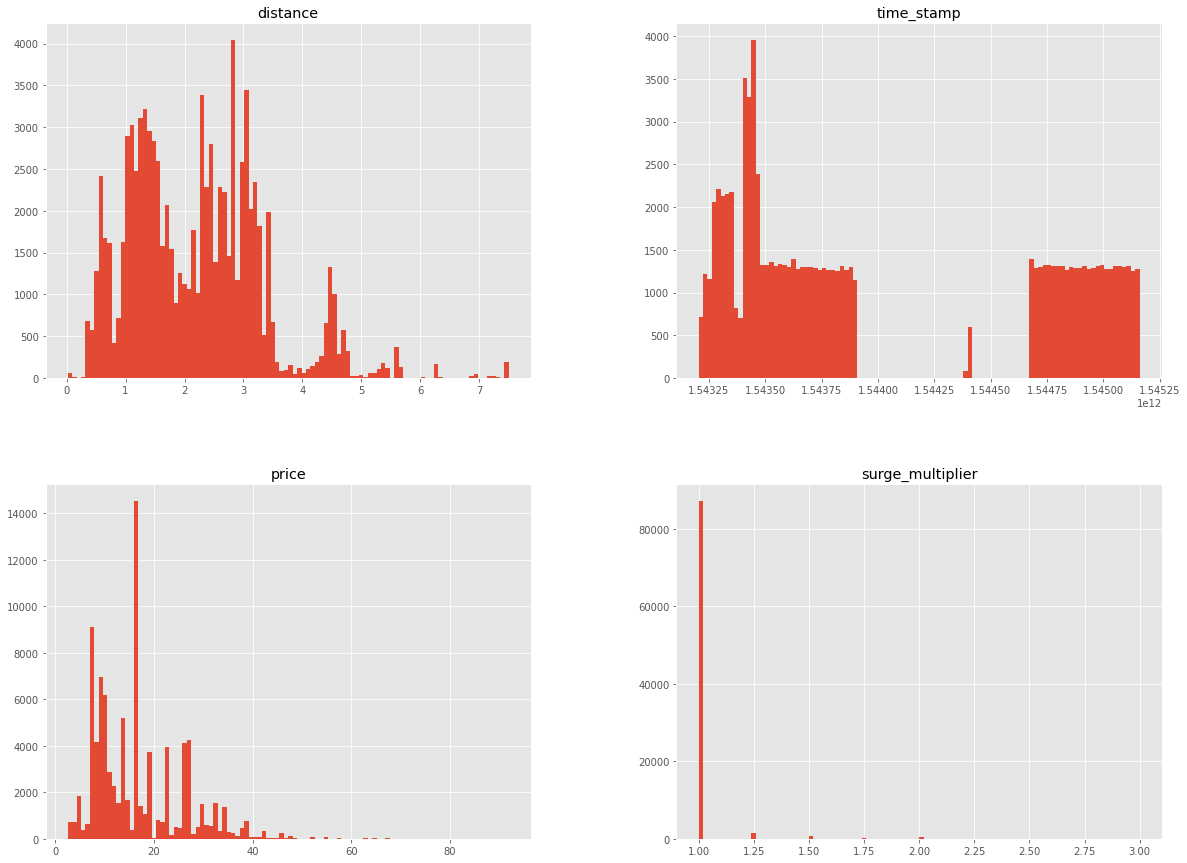

In [24]:
cab_rides.hist(bins=100,figsize=(20,15))
plt.show()

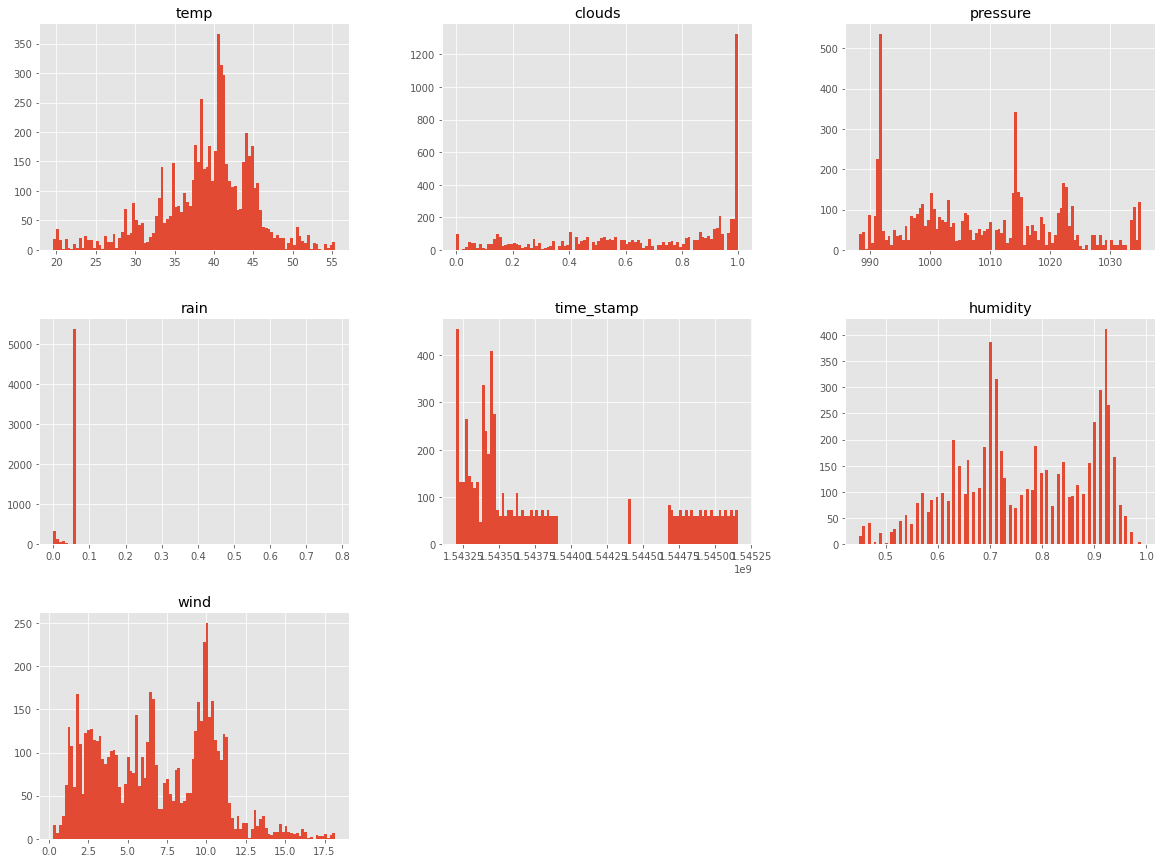

In [25]:
weather.hist(bins=100,figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


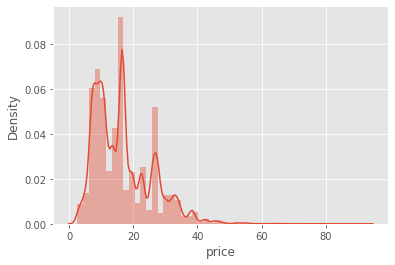

In [27]:
sns.distplot(cab_rides['price'])

# Bivariate Analysis

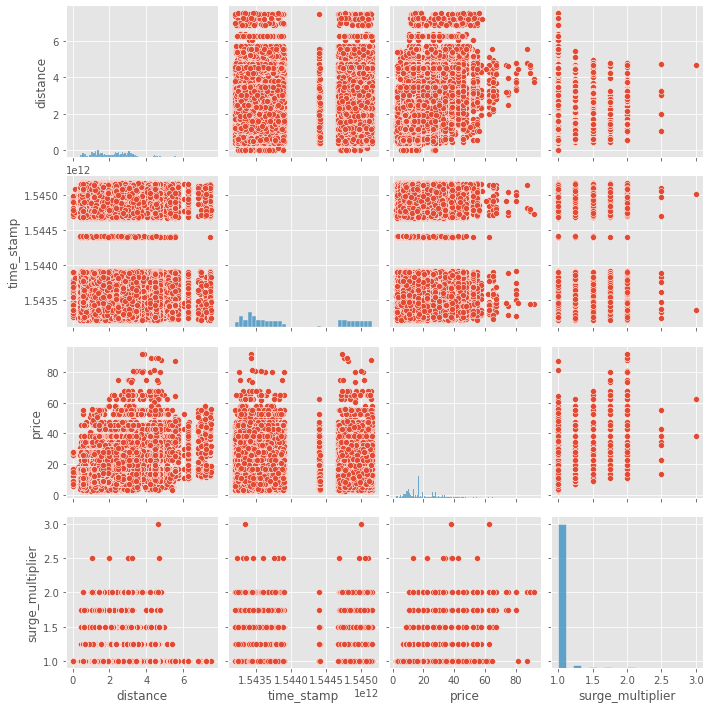

In [28]:
sns.pairplot(cab_rides)

In [57]:
sns.pairplot(cab_rides_final, hue='price', corner=True)

KeyboardInterrupt: ignored

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f1747270560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py", line 177, in <lambda>
    ref = weakref.ref(self, lambda ref, sid=id(self),
KeyboardInterrupt


Error in callback <function flush_figures at 0x7f17716ea050> (for post_execute):


KeyboardInterrupt: ignored

In [60]:
sns.countplot(x="distance", hue="price", data=cab_rides_final)

KeyboardInterrupt: ignored